## 4. Clipping

Often times we want to clip out LiDAR points using a shapefile. This can be done using pyfor's `Cloud.clip` method. pyfor integrates with geopandas and shapely, convenient geospatial packages for Python, to provide a way to clip point clouds. 

In [1]:
import pyfor
import geopandas as gpd

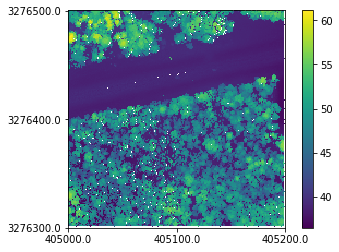

In [2]:
# Load the point cloud and plot.
pc = pyfor.cloud.Cloud("../data/test.las")
pc.plot()

Our clipping function requires a shapely `Polygon` as input. We can retrieve this information easily with geopandas.

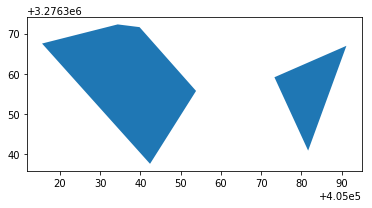

In [3]:
# Load our clippping geometry
poly_frame = gpd.read_file("../data/clip.shp")
poly_frame.plot()

As we can see, `clip.shp` contains just two `Polygons`. We can access them like so:

In [4]:
# Access the specific polygon to clip
polygon = poly_frame["geometry"].iloc[0]

# Print out the object type
[type(polygon) for polygon in poly_frame["geometry"]]

[shapely.geometry.polygon.Polygon, shapely.geometry.polygon.Polygon]

Great, we now have access to the datatype that `Cloud.clip` requires, a `shapely Polygon`. This is a very frequently used data type in vector analysis with GIS data in Python. We can proceed with clipping our point cloud.

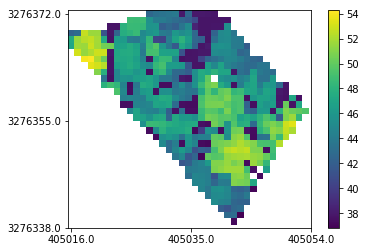

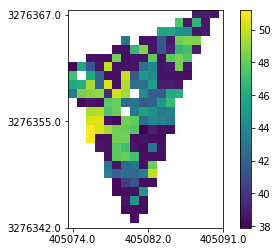

In [6]:
# Clip and plot
for polygon in poly_frame["geometry"]:
    pc.clip(polygon).plot()